In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.linalg import diagsvd
import matplotlib.cm as cm
import matplotlib.colors as mcol

In [2]:
def compute_hessenberg_matrix(n):
    """
    Returns the Hessenberg matrix of given size
    """
    A = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            if i <= j + 1:
                A[i][j] = n + 1 - max(i,j)
            else:
                A[i][j] = 0
    return A

def compute_inf_norm(A):
    """
    Returns the infinity norm of the given matrix 
    """
    row_sums = []
    for i in range(A.shape[0]):
        row_sum = 0
        for j in range(A.shape[0]):
            row_sum += abs(A[i][j])
        row_sums.append(row_sum)
    
    return max(row_sums)

def compute_1_norm(A):
    """"
    Returns the 1-norm of the given matrix
    """
    column_sums = []
    for i in range(A.shape[0]):
        column_sum = 0
        for j in range(A.shape[0]):
            column_sum += abs(A[j][i])
        column_sums.append(column_sum)
    
    return max(column_sums)

def compute_gerschgorin_radius(row, diag_entry):
    """
    Returns the summed absolute values of entries in the given row, 
    minus the specified entry index
    """
    row_sum = 0
    for i in range(len(row)):
        if i != diag_entry:
            row_sum += abs(row[i])
            
    return row_sum

In [3]:
hessenberg = [compute_hessenberg_matrix(x) for x in [12,25]]

#Computing the matrix inf and 1 norms for matrices
for matrix in hessenberg:
    print("Size {} Hessenberg matrix: 1-norm: {}, inf-norm: {}".format(matrix.shape[0], compute_1_norm(matrix), compute_inf_norm(matrix)))

Size 12 Hessenberg matrix: 1-norm: 55.0, inf-norm: 90.0
Size 25 Hessenberg matrix: 1-norm: 195.0, inf-norm: 350.0


In [4]:
#Computing the spectral radius and 2-norm
for matrix in hessenberg:
    eigenvals = [x for x in abs(np.linalg.eigvals(matrix))]
    print("Size {} ".format(matrix.shape[0]))
    print("Spectral Radius: {:.2f}".format(max(eigenvals)))
    print("Matrix 2-norm {:.2f}".format(np.linalg.norm(matrix, ord=2)))

Size 12 
Spectral Radius: 35.61
Matrix 2-norm 54.92
Size 25 
Spectral Radius: 81.61
Matrix 2-norm 194.43


In [5]:
#Computing tuples containing the diagonal entry and its radius for Gerschgorin's Theorem

gerschgorin_balls = []
for matrix in hessenberg:
    matrix_balls = []
    for i in range(matrix.shape[0]):
        matrix_balls.append((matrix[i][i], compute_gerschgorin_radius(matrix[i], i)))
    gerschgorin_balls.append(matrix_balls)
    

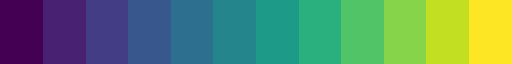

In [20]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

viridis = mpl.colormaps['viridis'].resampled(12)
viridis

In [17]:
gerschgorin_balls

[[(13.0, 77.0),
  (12.0, 77.0),
  (11.0, 65.0),
  (10.0, 54.0),
  (9.0, 44.0),
  (8.0, 35.0),
  (7.0, 27.0),
  (6.0, 20.0),
  (5.0, 14.0),
  (4.0, 9.0),
  (3.0, 5.0),
  (2.0, 2.0)],
 [(26.0, 324.0),
  (25.0, 324.0),
  (24.0, 299.0),
  (23.0, 275.0),
  (22.0, 252.0),
  (21.0, 230.0),
  (20.0, 209.0),
  (19.0, 189.0),
  (18.0, 170.0),
  (17.0, 152.0),
  (16.0, 135.0),
  (15.0, 119.0),
  (14.0, 104.0),
  (13.0, 90.0),
  (12.0, 77.0),
  (11.0, 65.0),
  (10.0, 54.0),
  (9.0, 44.0),
  (8.0, 35.0),
  (7.0, 27.0),
  (6.0, 20.0),
  (5.0, 14.0),
  (4.0, 9.0),
  (3.0, 5.0),
  (2.0, 2.0)]]

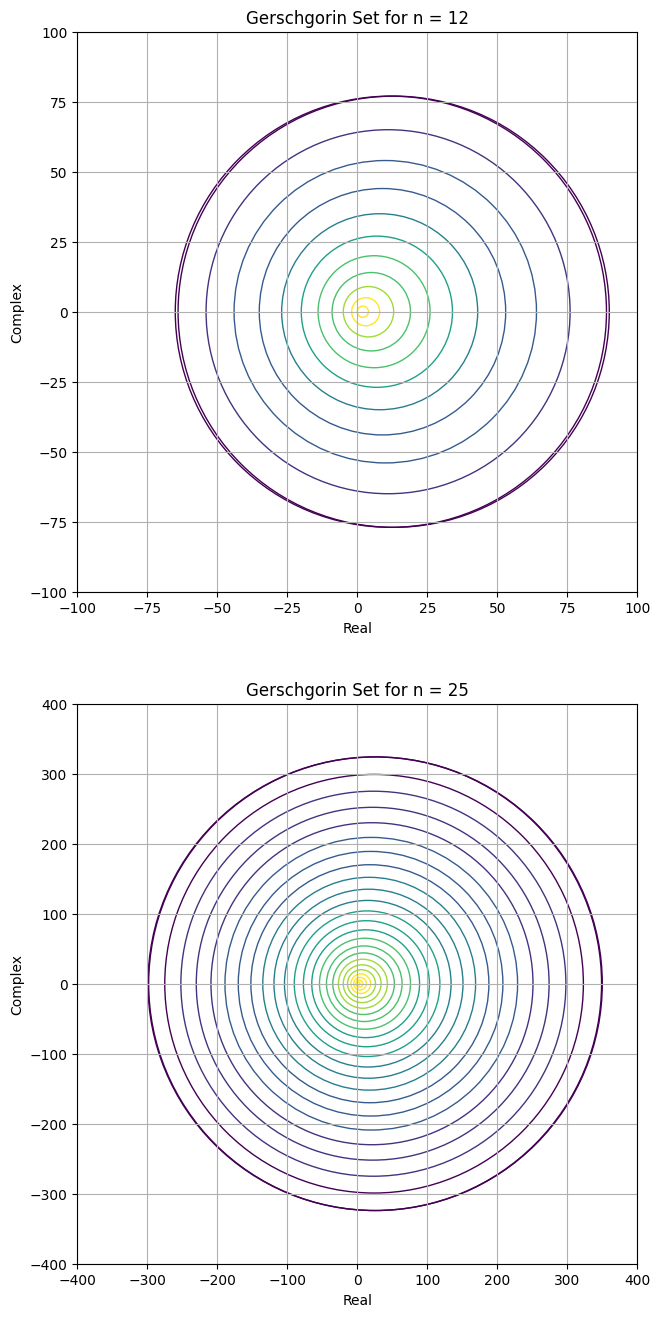

In [21]:
#Setting Color scale
#Larger values -> darker colors
viridis = mpl.colormaps['viridis'].resampled(8)
color12 = viridis(np.linspace(0, 1, 12))
color25 = viridis(np.linspace(0, 1, 25))

fig, ax = plt.subplots(2, figsize=(24,16))

#Plotting the gerschgorin plot for n = 12
i = 0
for tup in gerschgorin_balls[0]:
    center = (tup[0], 0)
    circle = Circle(center, tup[1], fill=False, color=color12[i])
    ax[0].add_patch(circle)
    i +=1

ax[0].set_title("Gerschgorin Set for n = 12")
ax[0].set_aspect('equal', adjustable='box')
ax[0].set_xlim(-100, 100)
ax[0].set_xlabel("Real")
ax[0].set_ylim(-100, 100)
ax[0].set_ylabel("Complex")
ax[0].grid(True)  

#Plotting the gerschgorin plot for n = 25
i = 0
for tup in gerschgorin_balls[1]:
    center = (tup[0], 0)
    circle = Circle(center, tup[1], fill=False, color=color25[i])
    ax[1].add_patch(circle)
    i+=1
    
ax[1].set_title("Gerschgorin Set for n = 25")
ax[1].set_aspect('equal', adjustable='box')
ax[1].set_xlim(-400, 400)
ax[1].set_xlabel("Real")
ax[1].set_ylim(-400, 400)
ax[1].set_ylabel("Complex")
ax[1].grid(True)  
plt.show()

In [86]:
for matrix in hessenberg:
    eigenvals = np.linalg.eigvals(matrix)
    real_eigenvals = 0
    complex_eigenvals = 0
    for val in eigenvals:
        if isinstance(val, complex):
            if val.imag != 0:
                complex_eigenvals+=1
            else:
                real_eigenvals+=1
        else:
            real_eigenvals+=1;
    
    real_sing = 0
    complex_sing = 0
    for sing in svdvals(matrix):
        if isinstance(sing, complex):
            if sing.imag != 0:
                complex_sing+=1
            else:
                real_sing+=1
        else:
            real_sing+=1;
            
    print("Size {}".format(matrix.shape[0]))
    print("Real Eigenvalues: {}, Complex Eigenvalues: {}".format(real_eigenvals, complex_eigenvals))
    print("Real Singular: {}, Complex Singular: {}".format(real_sing, complex_sing))

Size 12
Real Eigenvalues: 12, Complex Eigenvalues: 0
Real Singular: 12, Complex Singular: 0
Size 25
Real Eigenvalues: 13, Complex Eigenvalues: 12
Real Singular: 25, Complex Singular: 0
